In [1]:
import dicom
import pylab
import os
import numpy as np
from scipy.optimize import curve_fit
import scipy.misc
import matplotlib.pyplot as pyplot

# show dicom
def dcmshow(img):
    pylab.imshow(img.pixel_array, cmap=pylab.cm.bone)
    pylab.show()

# fitting function
def fitFunc (x, M, T1):
    return np.fabs(M * (1 - 2 * np.exp(-x/T1)))

In [2]:
rootdir = 'IR_images'

# read all files
files = []  # create an empty list
for dirName, subdirList, fileList in os.walk(rootdir):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            files.append(dicom.read_file(os.path.join(dirName,filename)))

In [3]:
Mimg = np.empty([files[0].Rows, files[0].Columns])
T1img = np.empty([files[0].Rows, files[0].Columns])

for r in range(0, files[0].Rows):
    for c in range(0, files[0].Columns):
        xdata = np.empty(len(files))
        ydata = np.empty(len(files))
        i = 0
        for file in files:
            xdata[i] = file.InversionTime
            ydata[i] = file.pixel_array[r][c]
            i += 1

        if(ydata[0] > 500):
            MT1 = curve_fit(fitFunc, xdata, ydata, [ydata[0], 600])[0]
            Mimg[r][c] = MT1[0]
            T1img[r][c] = MT1[1]

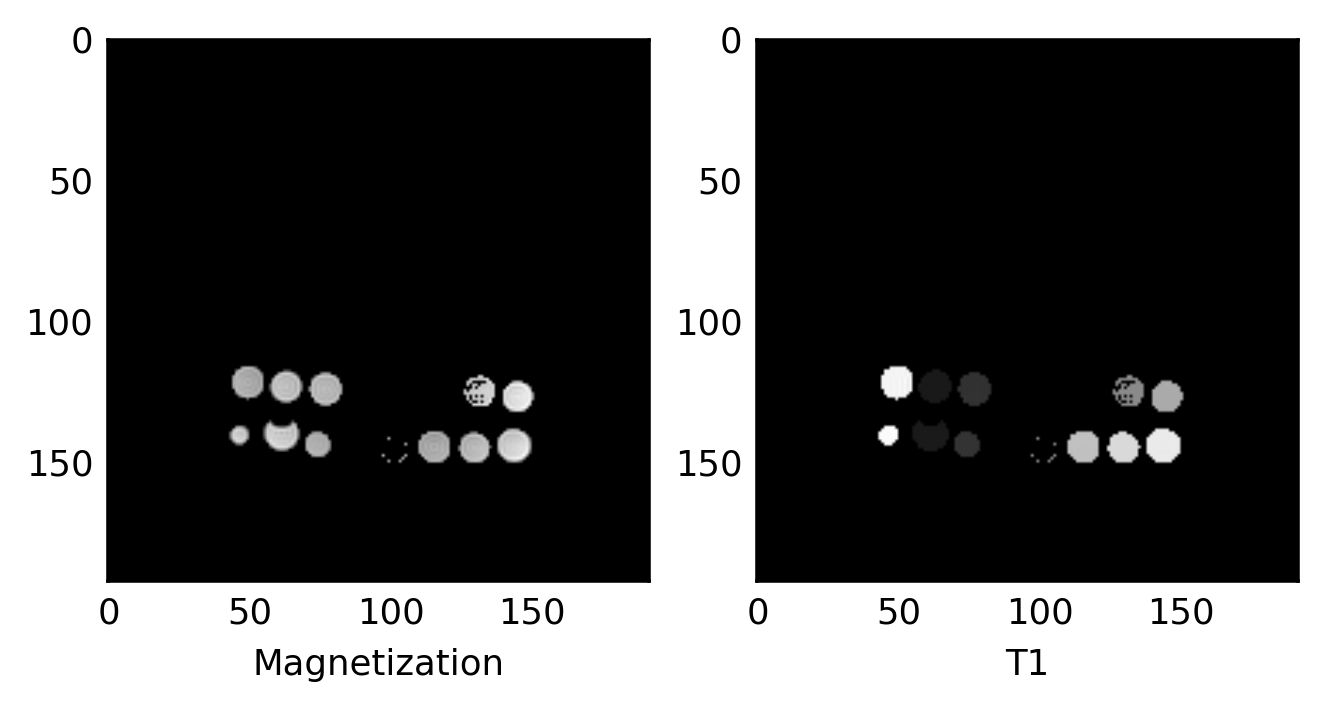

In [4]:
fig = pyplot.figure(dpi=256)
pyplot.set_cmap(pyplot.gray())

fig.add_subplot(121)
pyplot.imshow(Mimg)
pyplot.xlabel("Magnetization")

fig.add_subplot(122)
pyplot.xlabel("T1")
pyplot.imshow(T1img)

pyplot.show()